فراخوانی کاتابخانه های مهم از جمله numpy , pandas , matplotlib , seaborn برای اعمال EDA و تحلیل داده ها

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

فایل option0.75.csv و دیتافریم و پیش نمایش 5 داده اول

In [2]:
df = pd.read_csv('option0.75.csv')
df.head()

,district,doc,pre_date,cur_date,days,pre_read,cur_read,consumption,bill,obstcle,meter,Y,X,ID,flats,land_use,capacity,diameter
0,ناحيه 1 گرگان,11000562,950131,950313,44,240,287,47,223612,NaN,1392/10/01,4077062.685,273238.211214,26248700,4,مسكوني,0,0.75
1,ناحيه 1 گرگان,11000562,941112,950131,78,172,240,68,330283,NaN,1392/10/01,4077062.685,273238.211214,26248700,4,مسكوني,0,0.75
2,ناحيه 1 گرگان,11000562,950602,950719,48,379,464,85,357967,NaN,1392/10/01,4077062.685,273238.211214,26248700,4,مسكوني,0,0.75
3,ناحيه 1 گرگان,11000562,950719,950915,56,464,555,91,509158,NaN,1392/10/01,4077062.685,273238.211214,26248700,4,مسكوني,0,0.75
4,ناحيه 1 گرگان,11000562,950313,950426,44,287,330,43,212301,NaN,1392/10/01,4077062.685,273238.211214,26248700,4,مسكوني,0,0.75


اطلاعات کلی در مورد نوع ستون های موجود در دیتاست 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229153 entries, 0 to 229152
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   district     229153 non-null  object 
 1   doc          229153 non-null  int64  
 2   pre_date     229153 non-null  int64  
 3   cur_date     229153 non-null  int64  
 4   days         229153 non-null  int64  
 5   pre_read     229153 non-null  int64  
 6   cur_read     229153 non-null  int64  
 7   consumption  229153 non-null  int64  
 8   bill         229153 non-null  int64  
 9   obstcle      15706 non-null   object 
 10  meter        95475 non-null   object 
 11  Y            219292 non-null  float64
 12  X            219292 non-null  float64
 13  ID           229153 non-null  int64  
 14  flats        229153 non-null  int64  
 15  land_use     229153 non-null  object 
 16  capacity     229153 non-null  int64  
 17  diameter     229153 non-null  float64
dtypes: float64(3), int64(11)

مقدار درصد ناخالصی در هر ستون (داده های nan)

In [4]:
na_features = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in na_features:
    print(feature,'\t\t', np.round(df[feature].isnull().mean(),3), '%')

obstcle 		 0.931 %
meter 		 0.583 %
Y 		 0.043 %
X 		 0.043 %


مقادرهای nan موجود در هر ستون

In [5]:
df.isnull().sum()

district            0
doc                 0
pre_date            0
cur_date            0
days                0
pre_read            0
cur_read            0
consumption         0
bill                0
obstcle        213447
meter          133678
Y                9861
X                9861
ID                  0
flats               0
land_use            0
capacity            0
diameter            0
dtype: int64

ردیف های دارا مقدار nan در ستون meter

In [6]:
meter_nan_df = df[df['meter'].isna()]
meter_nan_df

,district,doc,pre_date,cur_date,days,pre_read,cur_read,consumption,bill,obstcle,meter,Y,X,ID,flats,land_use,capacity,diameter
7,ناحيه 1 گرگان,11100009,950426,950525,30,147,147,0,19900,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
8,ناحيه 1 گرگان,11100009,950125,950226,32,147,147,0,21227,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
9,ناحيه 1 گرگان,11100009,941125,941229,34,147,147,0,20753,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
10,ناحيه 1 گرگان,11100009,941229,950125,25,147,147,0,16583,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
11,ناحيه 1 گرگان,11100009,950326,950426,31,147,147,0,20563,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229148,ناحيه 2 گرگان,61697628,991004,991114,40,428,524,96,0,NaN,NaN,NaN,NaN,46171351,16,مسكوني,0,0.75
229149,ناحيه 2 گرگان,61697793,991004,991114,40,120,183,63,-1,NaN,NaN,NaN,NaN,46171368,16,مسكوني,0,0.75
229150,ناحيه 4 گرگان,61697885,991003,991115,42,268,335,67,448950,NaN,NaN,NaN,NaN,62011302,5,مسكوني,0,0.75
229151,ناحيه 7 گرگان,61697997,991014,991125,41,217,327,110,1158692,NaN,NaN,NaN,NaN,26283900,8,مسكوني,0,0.75


ردیف های دارا مقدار nan در ستون obstcle

In [7]:
obstcle_nan_df = df[df['obstcle'].isna()]
obstcle_nan_df

,district,doc,pre_date,cur_date,days,pre_read,cur_read,consumption,bill,obstcle,meter,Y,X,ID,flats,land_use,capacity,diameter
0,ناحيه 1 گرگان,11000562,950131,950313,44,240,287,47,223612,NaN,1392/10/01,4077062.685,273238.211214,26248700,4,مسكوني,0,0.75
1,ناحيه 1 گرگان,11000562,941112,950131,78,172,240,68,330283,NaN,1392/10/01,4077062.685,273238.211214,26248700,4,مسكوني,0,0.75
2,ناحيه 1 گرگان,11000562,950602,950719,48,379,464,85,357967,NaN,1392/10/01,4077062.685,273238.211214,26248700,4,مسكوني,0,0.75
3,ناحيه 1 گرگان,11000562,950719,950915,56,464,555,91,509158,NaN,1392/10/01,4077062.685,273238.211214,26248700,4,مسكوني,0,0.75
4,ناحيه 1 گرگان,11000562,950313,950426,44,287,330,43,212301,NaN,1392/10/01,4077062.685,273238.211214,26248700,4,مسكوني,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229148,ناحيه 2 گرگان,61697628,991004,991114,40,428,524,96,0,NaN,NaN,NaN,NaN,46171351,16,مسكوني,0,0.75
229149,ناحيه 2 گرگان,61697793,991004,991114,40,120,183,63,-1,NaN,NaN,NaN,NaN,46171368,16,مسكوني,0,0.75
229150,ناحيه 4 گرگان,61697885,991003,991115,42,268,335,67,448950,NaN,NaN,NaN,NaN,62011302,5,مسكوني,0,0.75
229151,ناحيه 7 گرگان,61697997,991014,991125,41,217,327,110,1158692,NaN,NaN,NaN,NaN,26283900,8,مسكوني,0,0.75


ردیف های دارا مقدار nan در ستون X

In [8]:
x_nan_df = df[df['X'].isna()]
x_nan_df

,district,doc,pre_date,cur_date,days,pre_read,cur_read,consumption,bill,obstcle,meter,Y,X,ID,flats,land_use,capacity,diameter
7,ناحيه 1 گرگان,11100009,950426,950525,30,147,147,0,19900,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
8,ناحيه 1 گرگان,11100009,950125,950226,32,147,147,0,21227,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
9,ناحيه 1 گرگان,11100009,941125,941229,34,147,147,0,20753,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
10,ناحيه 1 گرگان,11100009,941229,950125,25,147,147,0,16583,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
11,ناحيه 1 گرگان,11100009,950326,950426,31,147,147,0,20563,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229148,ناحيه 2 گرگان,61697628,991004,991114,40,428,524,96,0,NaN,NaN,NaN,NaN,46171351,16,مسكوني,0,0.75
229149,ناحيه 2 گرگان,61697793,991004,991114,40,120,183,63,-1,NaN,NaN,NaN,NaN,46171368,16,مسكوني,0,0.75
229150,ناحيه 4 گرگان,61697885,991003,991115,42,268,335,67,448950,NaN,NaN,NaN,NaN,62011302,5,مسكوني,0,0.75
229151,ناحيه 7 گرگان,61697997,991014,991125,41,217,327,110,1158692,NaN,NaN,NaN,NaN,26283900,8,مسكوني,0,0.75


ردیف های دارا مقدار nan در ستون y

In [9]:
y_nan_df = df[df['Y'].isna()]
y_nan_df

,district,doc,pre_date,cur_date,days,pre_read,cur_read,consumption,bill,obstcle,meter,Y,X,ID,flats,land_use,capacity,diameter
7,ناحيه 1 گرگان,11100009,950426,950525,30,147,147,0,19900,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
8,ناحيه 1 گرگان,11100009,950125,950226,32,147,147,0,21227,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
9,ناحيه 1 گرگان,11100009,941125,941229,34,147,147,0,20753,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
10,ناحيه 1 گرگان,11100009,941229,950125,25,147,147,0,16583,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
11,ناحيه 1 گرگان,11100009,950326,950426,31,147,147,0,20563,NaN,NaN,NaN,NaN,11145301,1,مسكوني,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229148,ناحيه 2 گرگان,61697628,991004,991114,40,428,524,96,0,NaN,NaN,NaN,NaN,46171351,16,مسكوني,0,0.75
229149,ناحيه 2 گرگان,61697793,991004,991114,40,120,183,63,-1,NaN,NaN,NaN,NaN,46171368,16,مسكوني,0,0.75
229150,ناحيه 4 گرگان,61697885,991003,991115,42,268,335,67,448950,NaN,NaN,NaN,NaN,62011302,5,مسكوني,0,0.75
229151,ناحيه 7 گرگان,61697997,991014,991125,41,217,327,110,1158692,NaN,NaN,NaN,NaN,26283900,8,مسكوني,0,0.75


#### این کار برای زمانی است که بخواهیم در داده های جدید جنریت شده مقدار nan در جدول ما وجود نداشته باشد

In [10]:
# df['obstcle'].fillna('نامشخص', inplace=True)

مقادیر آماری برای هریک از ستون های موجود

In [11]:
df.describe()

,doc,pre_date,cur_date,days,pre_read,cur_read,consumption,bill,Y,X,ID,flats,capacity,diameter
count,2.291530e+05,229153.000000,229153.000000,229153.000000,229153.000000,229153.000000,229153.000000,2.291530e+05,2.192920e+05,219292.000000,2.291530e+05,229153.000000,229153.000000,229153.00
mean,1.787523e+07,970865.657879,972115.288187,49.256924,4365.168791,4420.116420,89.822542,7.341120e+05,3.960763e+06,264434.204508,3.072531e+07,4.085109,0.296797,0.75
std,1.326695e+07,14400.299887,14089.831836,21.565417,3581.155105,3572.825639,74.930229,9.657156e+05,6.849032e+05,45736.048354,1.651101e+07,2.587892,3.944769,0.00
min,1.100056e+07,860921.000000,941225.000000,1.000000,0.000000,0.000000,0.000000,-1.000000e+00,5.405413e+01,31.870210,1.100030e+07,1.000000,0.000000,0.75
25%,1.129993e+07,960331.000000,960514.000000,41.000000,1668.000000,1725.000000,39.000000,2.896670e+05,4.077931e+06,271540.388780,1.720240e+07,2.000000,0.000000,0.75
50%,1.144113e+07,970823.000000,971010.000000,45.000000,3567.000000,3625.000000,72.000000,5.265480e+05,4.079321e+06,272512.931799,2.431008e+07,4.000000,0.000000,0.75
75%,1.165726e+07,980921.000000,981106.000000,52.000000,6372.000000,6419.000000,120.000000,9.241460e+05,4.080320e+06,273112.421305,4.225190e+07,6.000000,0.000000,0.75
max,6.169834e+07,991115.000000,991203.000000,3221.000000,99983.000000,99983.000000,2942.000000,1.236235e+08,4.082853e+06,275529.262804,8.624250e+07,42.000000,296.000000,0.75


مقادیر موجود در ستون district

In [12]:
district = list(set(df.district))
district

['ناحيه روستايي گرگان',
 'املاک استيجاري اموزشي  ',
 ' قرارداد  3209 کد 10شرکت فاينانس پو يا فن هيرکان گر گان ',
 'ناحيه 50 مراکز اداري دولتي ',
 ' قرارداد 16135 کد 221شرکت فاينانس پيام سازه سپاهان  ',
 'ناحيه 2 گرگان',
 'ناحيه 6 گرگان',
 'ناحيه 1 گرگان',
 ' قرارداد  3210 کد 101شرکت فاينانس پو يا فن هيرکان گر گان ',
 ' قرارداد 1915 کد 102شرکت فاينانس پو يا فن هيرکان گر گان ',
 'ناحيه 8 گرگان',
 'ناحيه 3 گرگان',
 'ناحيه 9 گرگان',
 'ناحيه 5 گرگان',
 'ناحيه 4 گرگان',
 'ناحيه 7 گرگان']

مقادیر موجود در ستون doc

In [13]:
doc = list(set(df.doc))
print('type of doc : ', type(doc))
print('len: ', len(doc))
doc[0:20]

type of doc :  <class 'list'>
len:  7820


[11239431,
 41123854,
 11468821,
 11173910,
 11599895,
 11272217,
 11272225,
 11436066,
 11501607,
 11599917,
 11665461,
 11206711,
 11468855,
 11468863,
 11436112,
 11534416,
 11698262,
 11534424,
 11370600,
 41189481]

مقادیر موجود در ستون pre_date

In [14]:
pre_date = list(set(df.pre_date))
print('type of pre_date : ', type(doc))
print('len: ', len(doc))
doc[0:20]

type of pre_date :  <class 'list'>
len:  7820


[11239431,
 41123854,
 11468821,
 11173910,
 11599895,
 11272217,
 11272225,
 11436066,
 11501607,
 11599917,
 11665461,
 11206711,
 11468855,
 11468863,
 11436112,
 11534416,
 11698262,
 11534424,
 11370600,
 41189481]

مقادیر موجود در ستون cur_date

In [15]:
cur_date = list(set(df.cur_date))
print('type of cur_date : ', type(cur_date))
print('len: ', len(cur_date))
cur_date[0:20]

type of cur_date :  <class 'list'>
len:  1261


[950301,
 950302,
 950303,
 950306,
 950307,
 950308,
 950309,
 950310,
 950311,
 950312,
 950313,
 950314,
 950315,
 950316,
 950317,
 950318,
 950319,
 950320,
 950326,
 950327]

مقادیر موجود در ستون days

In [16]:
days = list(set(df.days))
print('type of days : ', type(days))
print('len: ', len(days))
days[0:20]

type of days :  <class 'list'>
len:  353


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

مقادیر موجود در ستون pre_read

In [17]:
pre_read = list(set(df.pre_read)) 
print('type of pre_read : ', type(pre_read))
print('len: ', len(pre_read))
pre_read[0:20]

type of pre_read :  <class 'list'>
len:  16023


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

مقادیر موجود در ستون cur_read

In [18]:
cur_read = list(set(df.cur_read)) 
print('type of cur_read : ', type(cur_read))
print('len: ', len(cur_read))
cur_read[0:20]

type of cur_read :  <class 'list'>
len:  16110


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

مقادیر موجود در ستون consumption

In [19]:
consumption = list(set(df.consumption)) 
print('type of consumption : ', type(consumption))
print('len: ', len(consumption))
consumption[0:20]

type of consumption :  <class 'list'>
len:  758


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

مقادیر موجود در ستون bill

In [20]:
bill = list(set(df.bill)) 
print('type of bill : ', type(bill))
print('len: ', len(bill))
bill[0:20]

type of bill :  <class 'list'>
len:  143204


[0,
 1,
 1572866,
 1048586,
 524301,
 786445,
 262165,
 1048600,
 262169,
 786458,
 262172,
 524318,
 786463,
 1048609,
 1835044,
 524326,
 524327,
 786471,
 1310761,
 262184]

مقادیر موجود در ستون obstcle

In [21]:
obstcle = list(set(df.obstcle)) 
print('type of obstcle : ', type(obstcle))
print('len: ', len(obstcle))
obstcle[0:20]

type of obstcle :  <class 'list'>
len:  3


[nan, 'از کار افتاده', 'قرائت نشده']

مقادیر موجود در ستون meter

In [22]:
meter = list(set(df.meter)) 
print('type of meter : ', type(meter))
print('len: ', len(meter))
meter[0:20]

type of meter :  <class 'list'>
len:  1727


['1396/07/28',
 '1390/06/16',
 '1398/03/30',
 '1390/11/26',
 '1390/01/22',
 '1395/06/08',
 '1395/12/30',
 '1399/01/24',
 '1393/02/29',
 '1398/11/30',
 '1397/09/14',
 '1390/05/26',
 '1394/05/21',
 '1391/03/04',
 '1397/11/21',
 '1392/01/19',
 '1394/03/12',
 '1391/12/12',
 '1395/09/13',
 '1395/02/26']

مقادیر موجود در ستون Y

In [23]:
Y = list(set(df.Y)) 
print('type of Y : ', type(Y))
print('len: ', len(Y))
Y[0:20]

type of Y :  <class 'list'>
len:  17184


[nan,
 nan,
 nan,
 nan,
 nan,
 4079519.15463,
 nan,
 4079519.24196,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 4080822.01771]

مقادیر موجود در ستون X

In [24]:
X = list(set(df.X)) 
print('type of X : ', type(X))
print('len: ', len(X))
X[0:20]

type of X :  <class 'list'>
len:  17206


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 273546.676798,
 nan,
 nan,
 nan,
 nan,
 31.87021,
 nan,
 nan,
 nan,
 36.847398600000005]

مقادیر موجود در ستون ID

In [25]:
ID = list(set(df.ID)) 
print('type of ID : ', type(ID))
print('len: ', len(ID))
ID[0:20]

type of ID :  <class 'list'>
len:  7820


[41680900,
 21102601,
 25002000,
 14352400,
 23363600,
 12222500,
 41713701,
 42532900,
 16941100,
 25034800,
 16842800,
 16744500,
 21561400,
 16646200,
 26476600,
 23101500,
 41943100,
 45121600,
 26280001,
 14712900]

مقادیر موجود در ستون flats

In [26]:
flats = list(set(df.flats )) 
print('type of flats : ', type(flats ))
print('len: ', len(flats ))
flats[0:20]

type of flats :  <class 'list'>
len:  24


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21]

مقادیر موجود در ستون land_use

In [27]:
land_use = list(set(df.land_use ))
print('type of land_use : ', type(land_use))
print('len: ', len(land_use ))
land_use [0:20]

type of land_use :  <class 'list'>
len:  1


['مسكوني']

مقادیر موجود در ستون capacity

In [28]:
capacity = list(set(df.capacity )) 
print('type of capacity : ', type(capacity ))
print('len: ', len(capacity ))
capacity [0:20]

type of capacity :  <class 'list'>
len:  57


[0, 131, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23]

مقادیر موجود در ستون diameter

In [29]:
diameter  = list(set(df.diameter )) 
print('type of doc : ', type(diameter ))
print('len: ', len(diameter ))
diameter [0:20]

type of doc :  <class 'list'>
len:  1


[0.75]

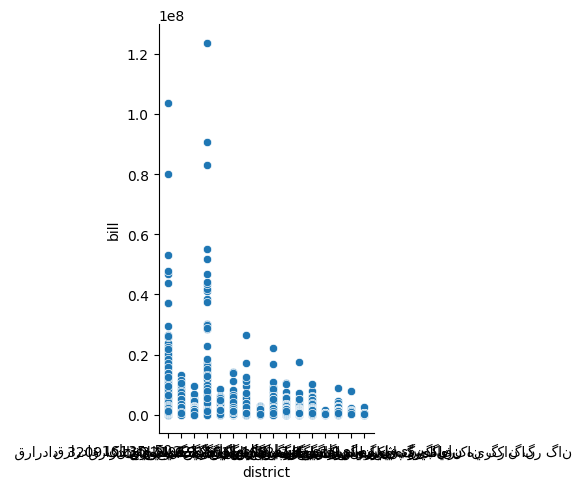

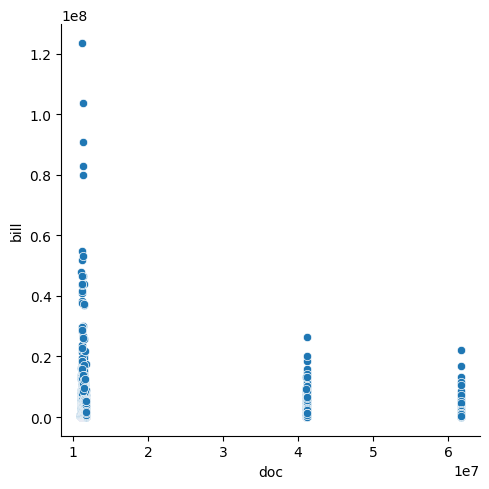

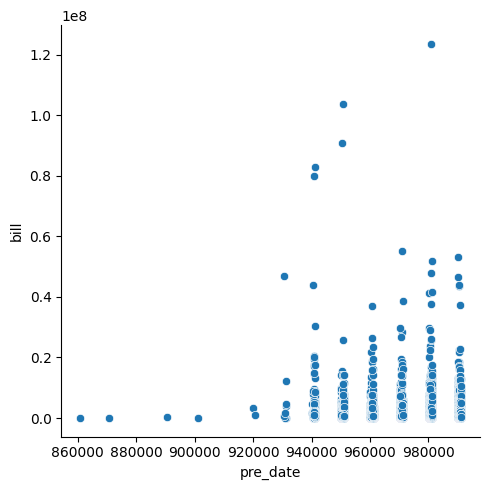

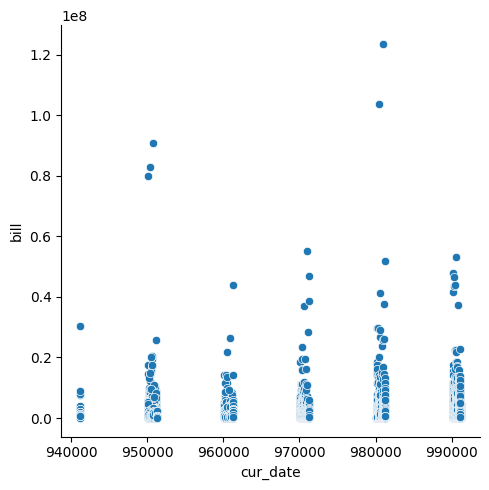

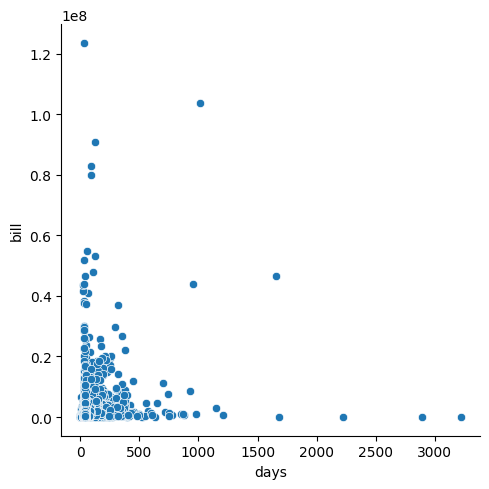

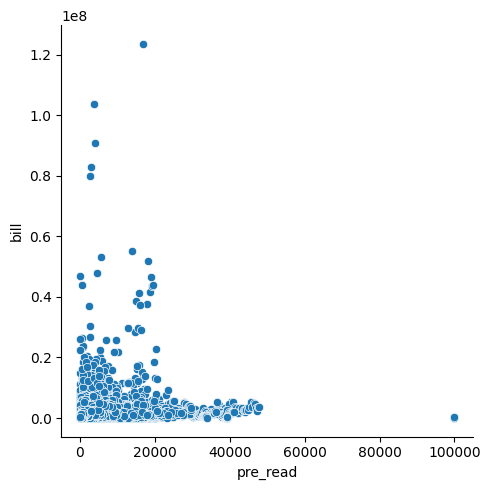

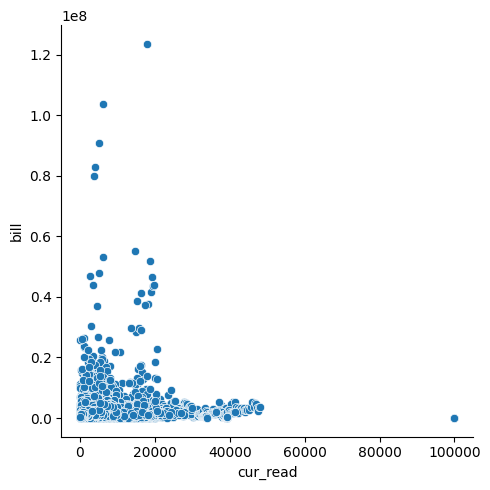

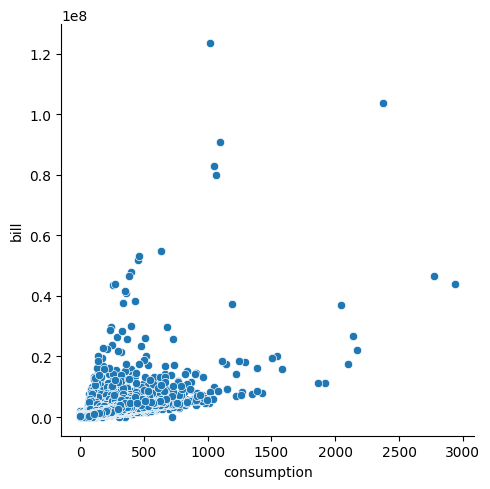

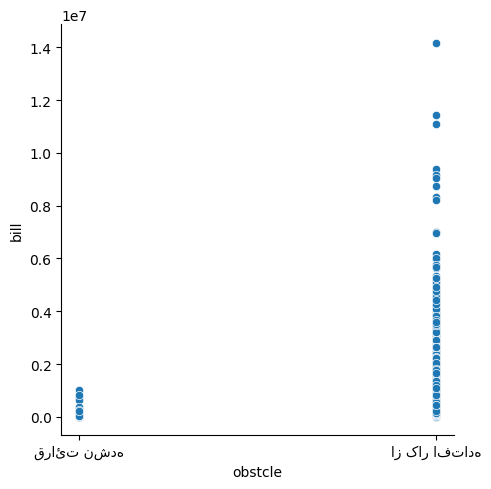

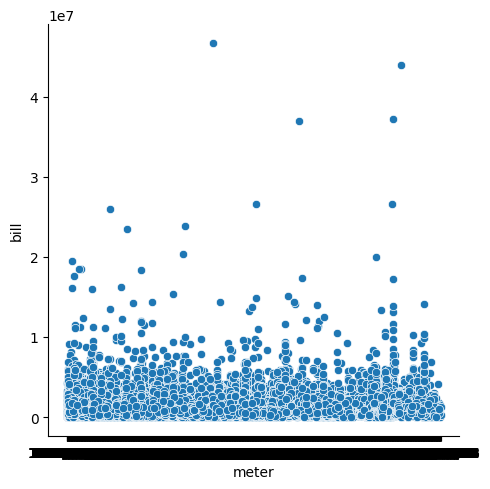

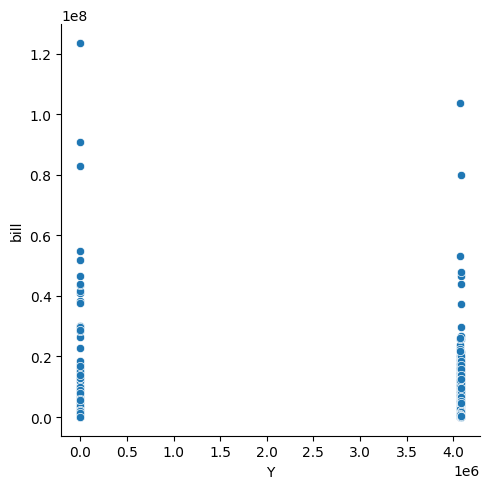

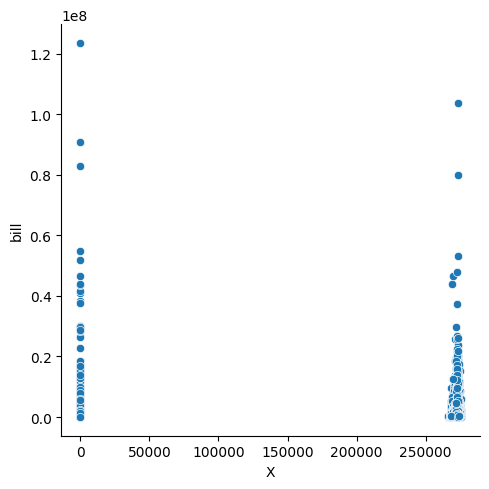

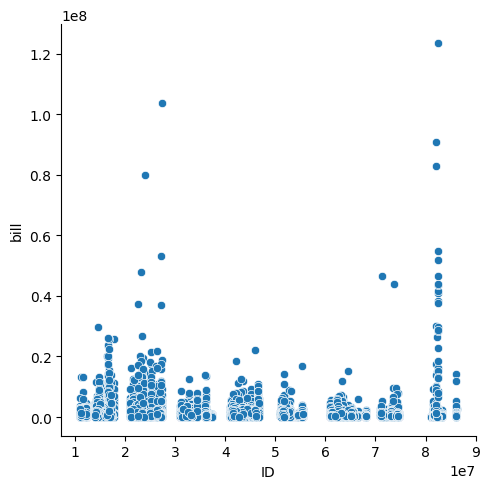

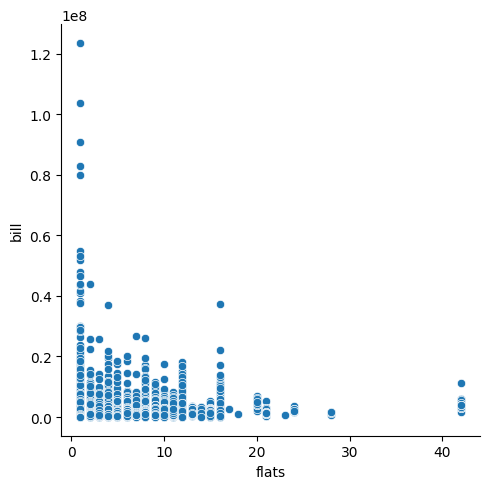

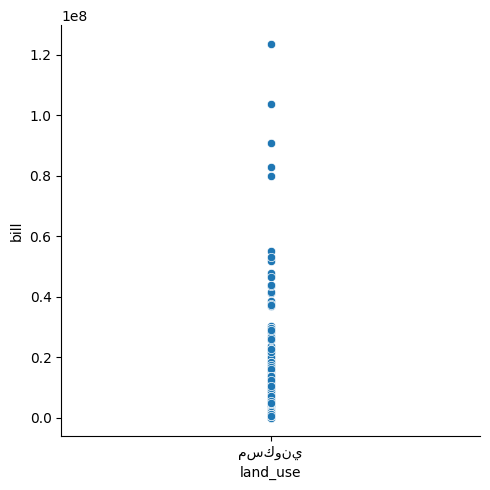

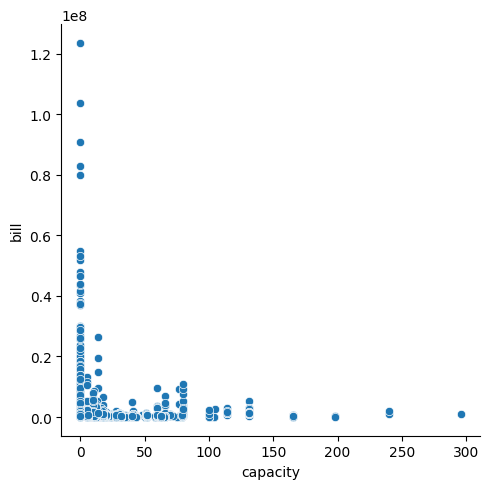

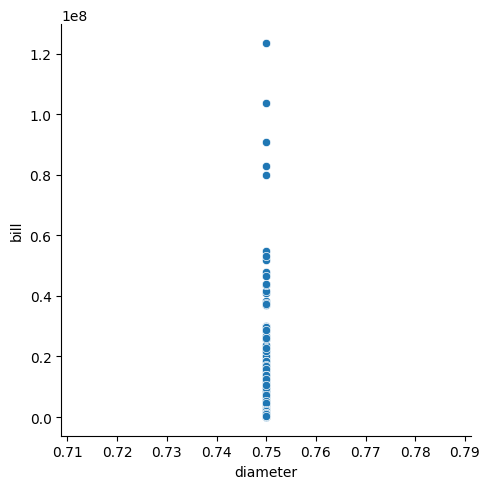

In [30]:
columns_name = list(df.columns)
for column in columns_name:
    if column != 'bill':
        sns.relplot(x = df[column], y = df.bill )

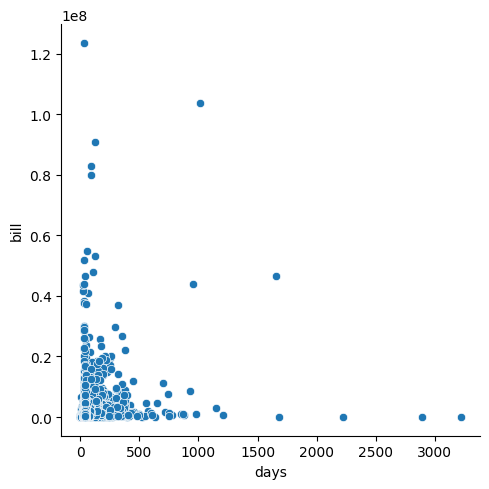

In [31]:
sns.relplot(x=df.days, y= df.bill)

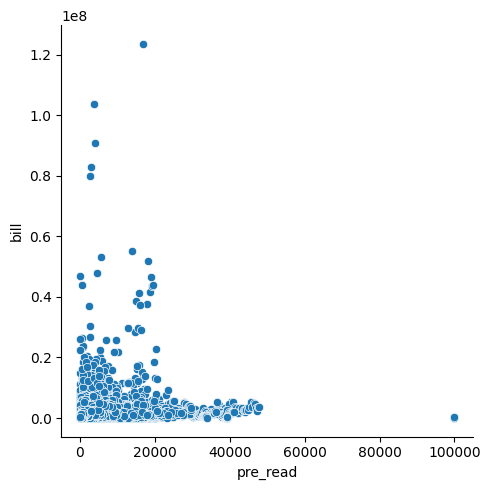

In [32]:
sns.relplot(x=df.pre_read, y= df.bill)

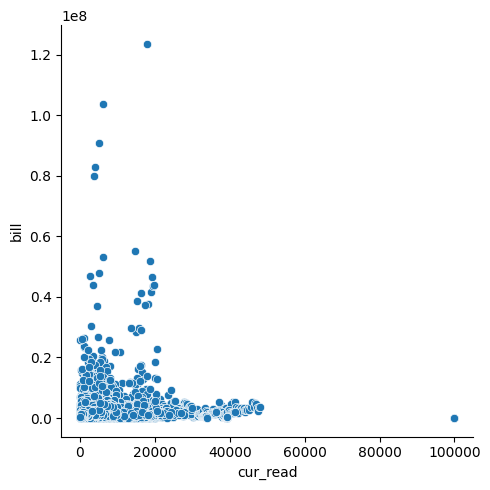

In [33]:
sns.relplot(x=df.cur_read, y= df.bill)

In [34]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

C:\Users\azizi\AppData\Local\Temp\ipykernel_14320\870181882.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


(14, 14)

<Axes: >

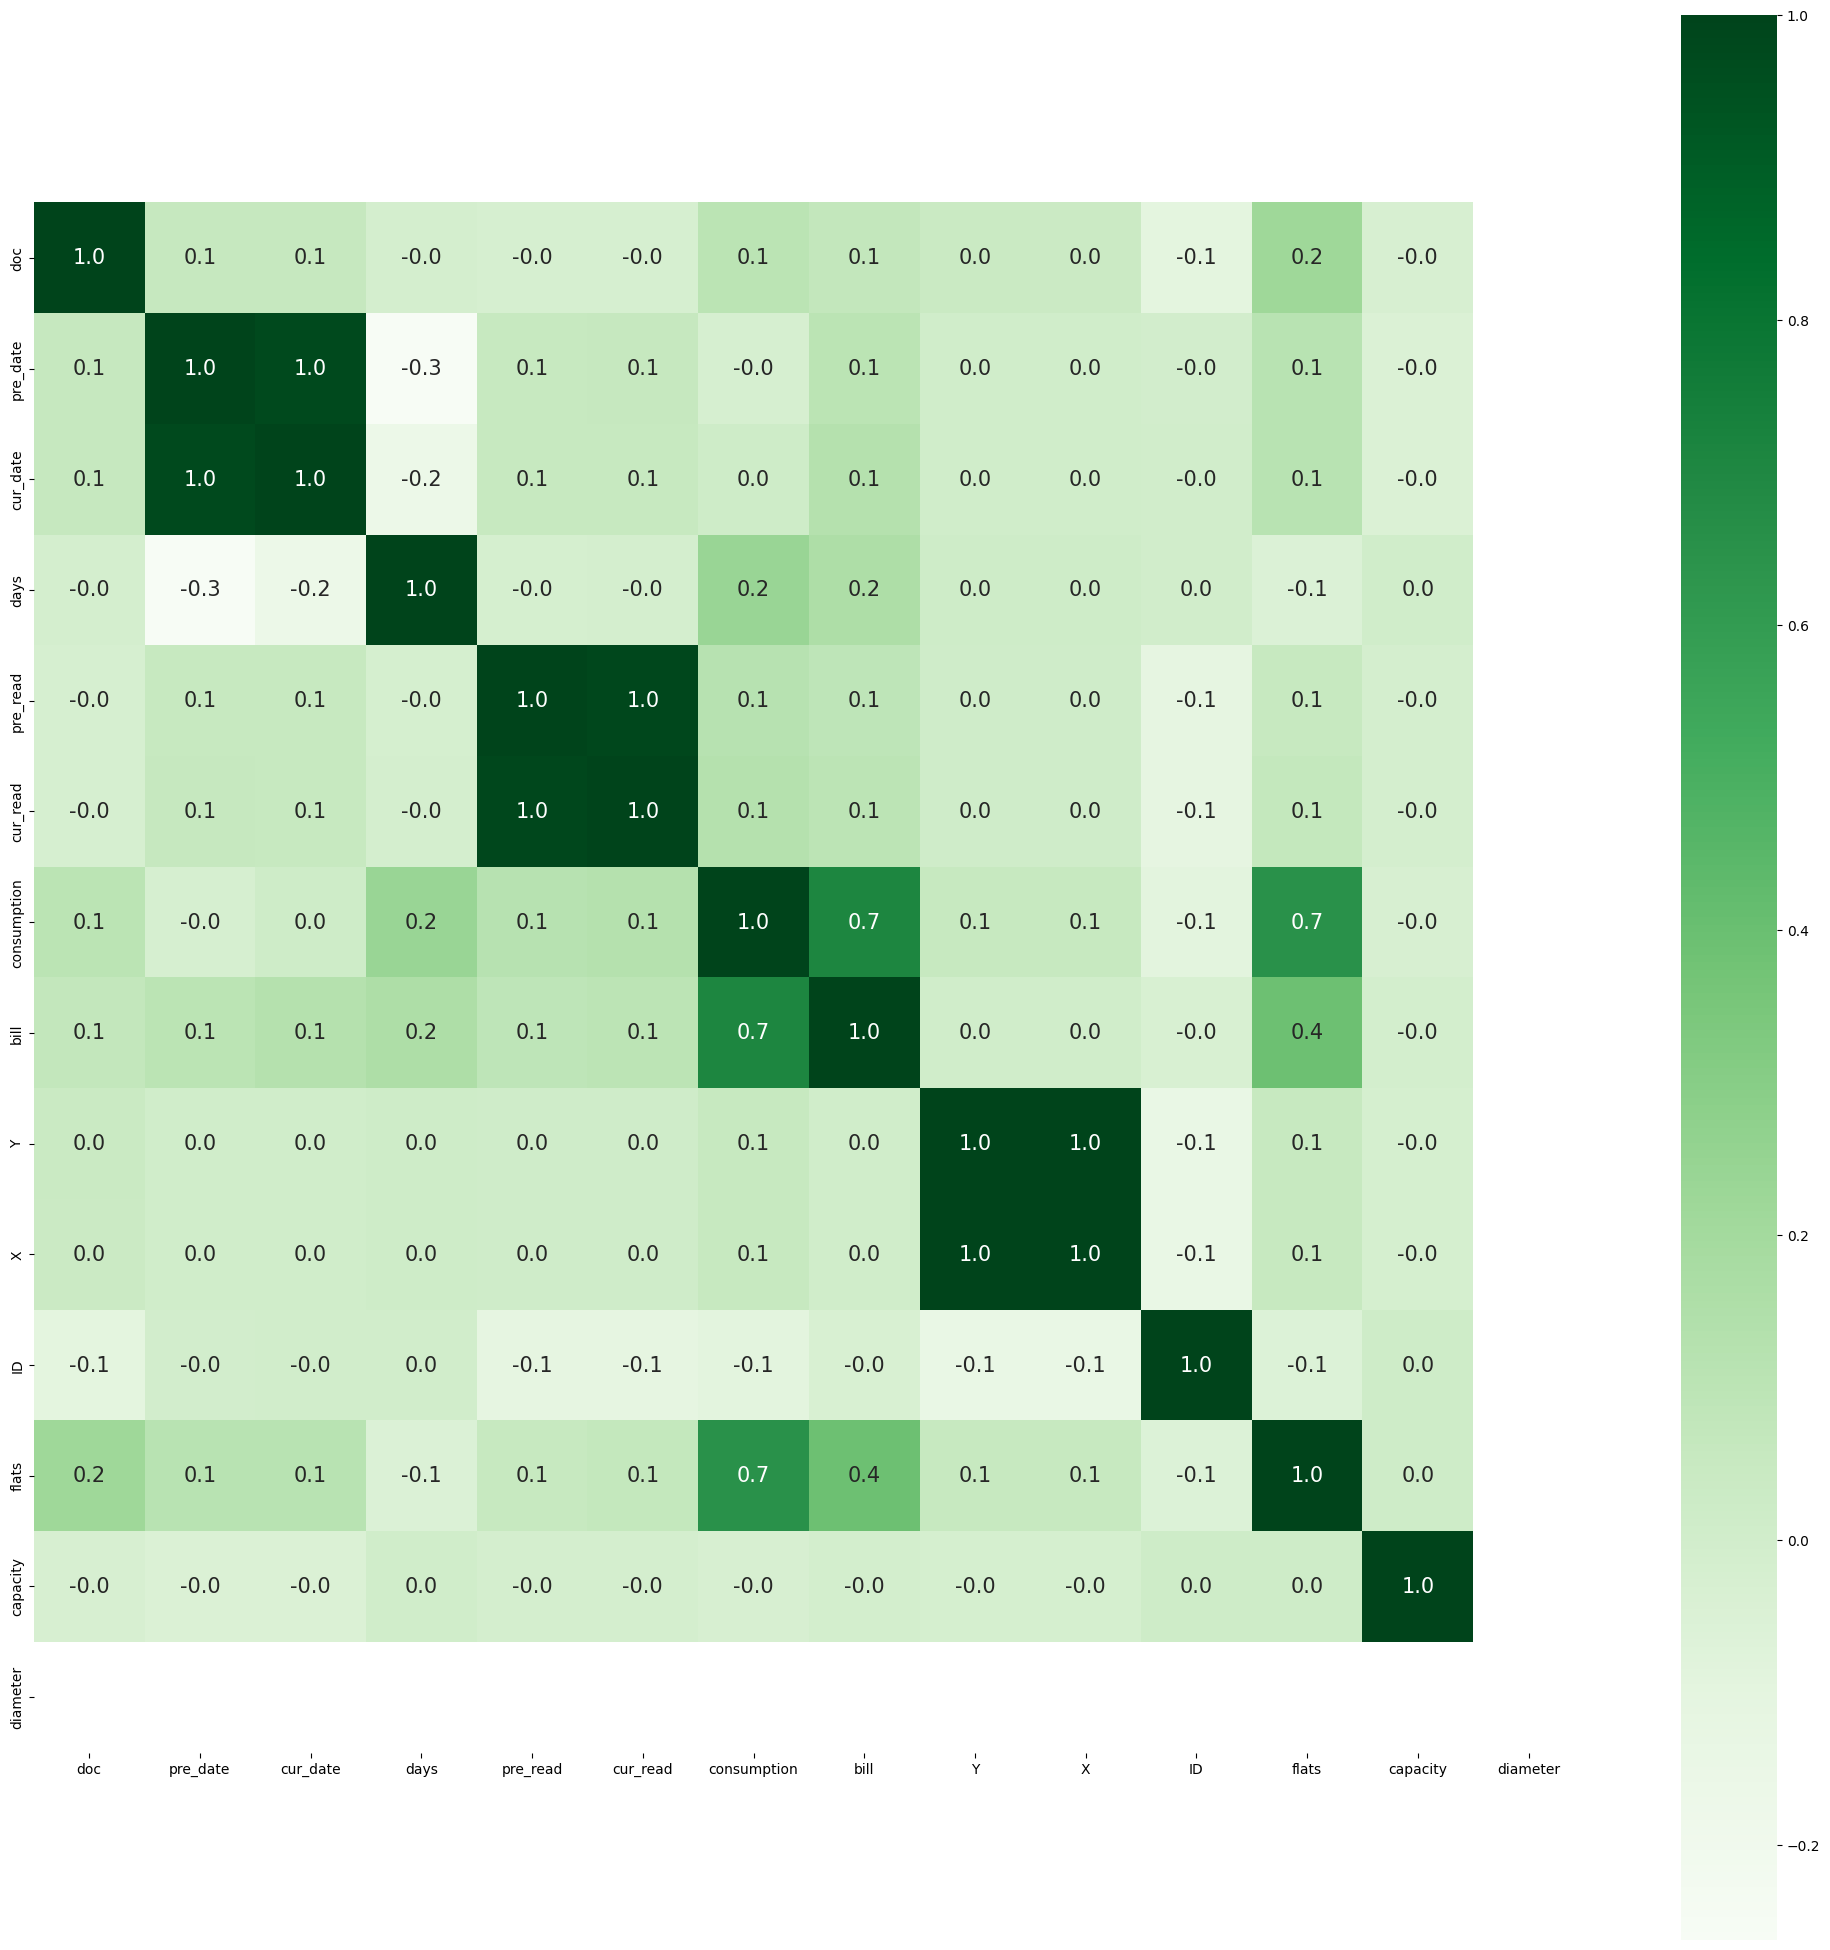

In [35]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

# Genrating new data

In [36]:
import pandas as pd
import numpy as np

# خواندن داده‌های اولیه (با فرض نام فایل "option0.75.csv" است)
data = pd.read_csv("option0.75.csv")

# پیش‌پردازش داده‌های اولیه (اگر نیاز دارید)

# تولید 10000 داده جدید با توزیع نرمال
mean = data.mean()
std_dev = data.std()
num_samples = 10000
new_data = np.random.normal(mean, std_dev, size=(num_samples, len(data.columns)))

# تولید 500 داده پرت با توزیع یکنواخت
lower_bound = data.min()
upper_bound = data.max()
num_outliers = 500
outliers = np.random.uniform(lower_bound, upper_bound, size=(num_outliers, len(data.columns)))

# ترکیب داده‌های جدید و اصلی
combined_data = pd.concat([data, pd.DataFrame(new_data), pd.DataFrame(outliers)], axis=0)

# ذخیره داده‌های جدید در فایل CSV (با فرض نام فایل "generated_data.csv" است)
combined_data.to_csv("generated_data.csv", index=False)


C:\Users\azizi\AppData\Local\Temp\ipykernel_14320\3424627517.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean()
C:\Users\azizi\AppData\Local\Temp\ipykernel_14320\3424627517.py:11: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_dev = data.std()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10000, 18) and arg 1 with shape (14,).